## Lab 1 - Recommendation system smallest 

In [3]:
movies="C:/Users/Noah7/code/Github/AI-Noah-Eliasson-OPA23/data/ml-latest-small/ml-latest-small/movies.csv"
ratings="C:/Users/Noah7/code/Github/AI-Noah-Eliasson-OPA23/data/ml-latest-small/ml-latest-small/ratings.csv"

df_movies_small=pd.read_csv(movies, usecols=["movieId", "title"], dtype={"movieId": "int32", "title": "str"})
df_ratings_small=pd.read_csv(ratings, usecols=["userId", "movieId", "rating"], dtype={"userId": "int32", "movieId": "int32", "rating": "float32"})

In [4]:
df_movies_small.head()

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)


In [167]:
import pandas as pd 
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
from fuzzywuzzy import process
import plotly_express as px
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np

In [5]:
df_ratings_small.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [6]:
# spare matrix 
#        Users
#        [4,4,5]
# movies [4,3,2]
#        [3,1,3]

# think of it as database tabels, we can also pivot tables, using one tables index to use that as index on another table, to then get new info about the certain index in this 
# case movieId 

movies_users= df_ratings_small.pivot(index="movieId", columns="userId", values="rating").fillna(0)
mat_movies_users_small= csr_matrix(movies_users.values)
 
mat_movies_users_small

<9724x610 sparse matrix of type '<class 'numpy.float32'>'
	with 100836 stored elements in Compressed Sparse Row format>

In [7]:
# Eculidean distance 
# Manhattan distance
# Minkowski distance
# Cosine similarity  
model_KNN= NearestNeighbors(metric="cosine", algorithm="brute", n_neighbors=20)

In [8]:
model_KNN.fit(mat_movies_users_small)

NearestNeighbors(algorithm='brute', metric='cosine', n_neighbors=20)

In [9]:
# Recommender(movie_name) => List of Movies recommended 

def recommender(movie_name, data, model, n_recommendations ):
    model.fit(data)
    idx=process.extractOne(movie_name, df_movies_small["title"])[2]
    print("Movies Selected: ", df_movies_small["title"][idx], "Index: ", idx)
    print("Searching for recommendations.....")
    distances, indices=model.kneighbors(data[idx], n_neighbors=n_recommendations)
    for i in indices:
        print(df_movies_small["title"][i].where(i!=idx))
        

recommender("lord of the rings", mat_movies_users_small, model_KNN, 20)

Movies Selected:  Lord of the Rings, The (1978) Index:  1577
Searching for recommendations.....
1577                                                  NaN
2374                                 War Zone, The (1999)
2283                                       Yojimbo (1961)
2314    Women on the Verge of a Nervous Breakdown (Muj...
1505                           Black Cauldron, The (1985)
4309                                         Holes (2003)
2378                              Bicentennial Man (1999)
2452                Hard-Boiled (Lat sau san taam) (1992)
3181    City of Women, The (Città delle donne, La) (1980)
1375                Fear and Loathing in Las Vegas (1998)
2648                                       Cabaret (1972)
972                                    Down by Law (1986)
1204                            Leave It to Beaver (1997)
2819            Missing in Action 2: The Beginning (1985)
2234    Man and a Woman, A (Un homme et une femme) (1966)
1718                              

---------

## 1.1 - Movielens full - EDA

In [10]:
# read files and specify cols 

movies = "C:/Users/Noah7/code/Github/AI-Noah-Eliasson-OPA23/data/ml-latest/movies.csv"
ratings = "C:/Users/Noah7/code/Github/AI-Noah-Eliasson-OPA23/data/ml-latest/ratings.csv"

df_movies = pd.read_csv(movies, usecols=["movieId", "title"], dtype={"movieId": "int32", "title": "str"})
df_ratings= pd.read_csv(ratings, usecols=["userId", "movieId", "rating"], dtype={"userId": "int32", "movieId": "int32", "rating": "float32"})
df_movies


,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)
...,...,...
86532,288967,State of Siege: Temple Attack (2021)
86533,288971,Ouija Japan (2021)
86534,288975,The Men Who Made the Movies: Howard Hawks (1973)
86535,288977,Skinford: Death Sentence (2023)


### EDA

1.1 B)

In [11]:
df_merged = pd.merge(df_ratings, df_movies, on="movieId", how="inner")

title_count = df_merged["title"].value_counts()

top_10_rated = title_count[:10].reset_index()
top_10_rated.columns = ['title', 'count']


fig = px.bar(top_10_rated, x="title", y="count", title="The most rated movies")
fig.show()
fig.write_html("1_1B_plot")

1.1 C)

In [12]:

mean_ratings = df_merged.groupby("title")["rating"].mean()

mean_ratings = pd.DataFrame(mean_ratings).reset_index()
mean_ratings_10 = mean_ratings[mean_ratings["title"].isin(top_10_rated["title"])]
fig = px.bar(mean_ratings_10, x="title", y="rating", title="Mean of rating points")
fig.show()
fig.write_html("1_1C_plot")

1.1 D) 

In [13]:
df_movies["year"] = df_movies["title"].apply(lambda x: x.split("(")[-1].split(")")[0])

df_movies["year"] = pd.to_numeric(df_movies["year"], errors="coerce")
df_movies.dropna(subset=["year"], inplace=True)

year_count = df_movies["year"].value_counts()

movies_per_year = year_count.reset_index()
movies_per_year.columns = ["year", "count"]

movies_per_year.sort_values(by="year", inplace=True)
fig = px.line(movies_per_year, x="year", y="count", title="movies made per year", line_shape="spline", )
fig.show()



1.1 E) 

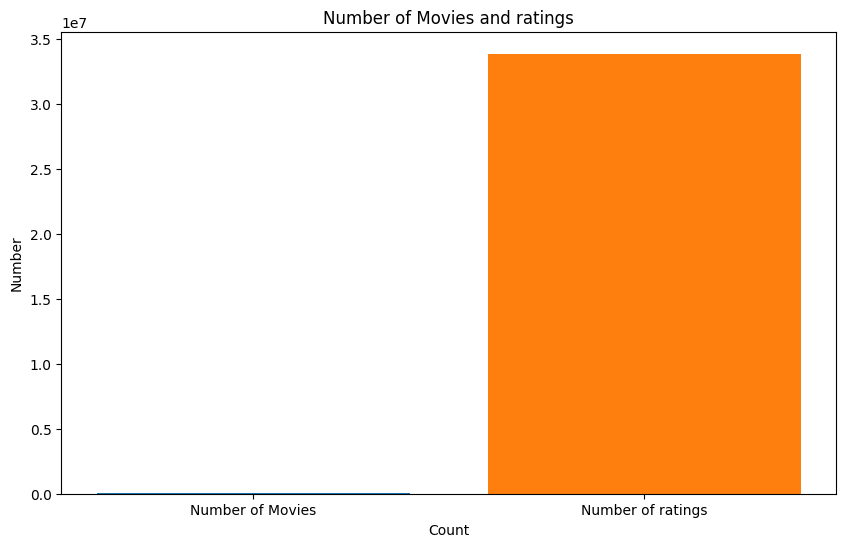

In [14]:
movie_count = len(df_movies["movieId"])
rating_count = len(df_ratings["rating"])
# using matplotlib just to try, i prefer using plotly_express
plt.figure(figsize=(10, 6))
plt.bar("Number of Movies", movie_count)
plt.bar("Number of ratings", rating_count)
plt.title('Number of Movies and ratings')
plt.xlabel('Count')
plt.ylabel('Number')
plt.show()



----- 

### Sort and drop data
- my thoughts are to drop year from the df_movies dataframe, as the years can be extracted from the title, the dataset will then be somewhat smaller and not lose any potential.
- another way to allocate memory more efficently i can specify the datatypes when creating the dataframes as we have done above.

- this is not enough though since the datasets are that large, my idea is to filter our most of the user, creating a sample of users with the most rating.
- altarnate approach is to sample users but also sample genres, for example create subsets of tables, 1 for action/sci-fi and 1 for drama/romance to then let the user choose what genre he or she want to get a recommended film

In [49]:
# get the users with the highest rating count to use in the pivot get a sample of 1000 users to use in the pivot, that way we get all movies and a great sample of users to base ratings on
user_rating_count = df_ratings.groupby("userId").size().reset_index(name="ratings_count") # set name of size of ratings to ratings_count
top_user = user_rating_count.sort_values(by="ratings_count", ascending=False)[:1000] # sort by ratings_count and get the top 1000 users with the most ratings
df_ratings_1000 = df_ratings[df_ratings["userId"].isin(top_user["userId"])] # create new df_ratings_1000 is = to df_ratings if the userId isin top_user of userId

movie_users = df_ratings_1000.pivot(index="movieId", columns="userId", values="rating").fillna(0)

movie_users


userId,461,487,897,2270,2374,2402,3469,3517,3951,4127,...,327625,328859,328961,329487,329594,329845,329954,330196,330517,330535
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.5,4.5,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,...,3.0,3.5,4.5,5.0,4.5,3.0,0.0,2.5,2.0,3.0
2,4.5,2.0,3.0,0.0,0.0,3.5,2.5,2.0,0.0,0.0,...,0.0,2.5,3.0,5.0,3.0,5.0,3.5,3.0,0.0,3.0
3,0.0,0.0,0.0,0.0,0.0,3.0,3.0,0.0,0.0,0.0,...,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,2.5,0.0,2.0,2.0,3.0,1.5,0.0,0.0,...,0.0,1.5,0.0,3.0,2.5,1.5,0.0,0.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288957,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
288959,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
288965,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Create csr_matrix to since there are alot of 0 values in our table

In [16]:
mat_movies_users_large= csr_matrix(movies_users.values)
mat_movies_users_large

<9724x610 sparse matrix of type '<class 'numpy.float32'>'
	with 100836 stored elements in Compressed Sparse Row format>

### LineProfiler
- Using line_profiler from LineProfiler() to visualize the lines of code that takes up the most time.
- 1 fault is that this runs faster since i have run this several times in this enviorment. This creates caching and memory opimization for me in this session but the % of the time should be correct, this is being proven even if i restart the kernel and clear the memory.

In [17]:
from line_profiler import LineProfiler

def execution_time():
    df_movies=pd.read_csv(movies, usecols=["movieId", "title"], dtype={"movieId": "int32", "title": "str"})
    df_ratings=pd.read_csv(ratings, usecols=["userId", "movieId", "rating"], dtype={"userId": "int32", "movieId": "int32", "rating": "float32"})
    movies_users= df_ratings.pivot(index="movieId", columns="userId", values="rating").fillna(0)
    mat_movies_users= csr_matrix(movies_users.values)
    mat_movies_users
    pass

profiler = LineProfiler()
profiler.add_function(execution_time)
profiler.run("execution_time()")

profiler.print_stats()
    

### recommender system from youtube video

In [18]:


# model_KNN= NearestNeighbors(metric="cosine", algorithm="brute", n_neighbors=5)

# def recommender(movie_name, data, model, n_recommendations ):
#     model.fit(data)
#     idx=process.extractOne(movie_name, df_movies["title"])[2]
#     print("Movies Selected: ", df_movies["title"][idx], "Index:", idx)
#     print("Searching for recommendations.....")
#     distances, indices=model.kneighbors(data[idx], n_neighbors=n_recommendations)
#     print(idx)
#     for i in indices[0]:
#         if i != idx:
#             print(df_movies["title"][i])
        
        
# recommender("lord of the rings", mat_movies_users_large, model_KNN, 6)


Movies Selected:  Lord of the Rings, The (1978) Index: 2026
Searching for recommendations.....
2026
Heaven Can Wait (1978)
Brassed Off (1996)
Child's Play 3 (1991)
You Can't Take It with You (1938)
Velvet Goldmine (1998)


In [139]:
model_KNN = NearestNeighbors(metric="cosine", algorithm="brute", n_neighbors=5)

def recommender(data, model, n_recommendations):
    
    movie_name=input()
    idx = process.extractOne(movie_name, df_movies["title"])[2] # toy story (1995), 90, 0 <- idx 

    if idx >= data.shape[0]: # out of bounds check for testing according to lineprofiler this takes no time from the process 
        raise IndexError("Index is out of bounds")
    
    print("---------------------------------------------")
    print("Movies Selected: ", df_movies["title"][idx], "Index:", idx)
    print("Searching for recommendations.....")
    print("---------------------------------------------")
    distances, indices = model.kneighbors(data[idx], n_neighbors=n_recommendations) # kneighbors only takes 2D arrays as arguments, we ensure that we reshape this to a 2d array, 
    print("Nearest Neighbors Indices:", indices) # test obs - for testing use distance aswell 

    for i in indices[0]: # indeces is a tuple containing array of indices of the nearest neighbors loop though the first elemnt of the 
         if i != idx:
             print(f"{df_movies['title'][i]}") # If i is not the index of the query point, the title of the movie corresponding to the index i is printed

#fit the model outside the function or else its retraining every instance 
model_KNN.fit(mat_movies_users_large)


# Call the recommender function
recommender(mat_movies_users_large, model_KNN, 6)

---------------------------------------------
Movies Selected:  Land and Freedom (Tierra y libertad) (1995) Index: 622
Searching for recommendations.....
---------------------------------------------
Nearest Neighbors Indices: [[622  92 615 594 584 592]]
Recommendations:
1. Land and Freedom (Tierra y libertad) (1995)
2. Beautiful Girls (1996)
3. Asfour Stah (1990)
4. Great Day in Harlem, A (1994)
5. Batman (1989)
6. Love and a .45 (1994)


### Disease prediction (bonus)


In [183]:
df_disease = pd.read_csv("C:/Users/Noah7/code/Github/AI-Noah-Eliasson-OPA23/data/cardio_train.csv", sep=";")
df_disease.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [92]:
df_disease.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


### 2.0 EDA 

#### A) Hur många är positiva för hjärt-kärlsjukdom och hur många är negativa? 
- 0 = neg
- 1 = pos

In [93]:
df_disease.value_counts("cardio")

cardio
0    35021
1    34979
Name: count, dtype: int64

##### B) Hur stor andel har normala, över normala och långt över normala kolesterolvärden? Rita ett tårtdiagram.

([<matplotlib.patches.Wedge at 0x25e40ea6d90>,
 [Text(-0.7737925922939366, 0.7818216063214356, 'Normal'),
  Text(0.44676363397280533, -1.0051876717108172, 'Above normal'),
  Text(1.0287089095776487, -0.3895612652145553, 'Well above normal')])

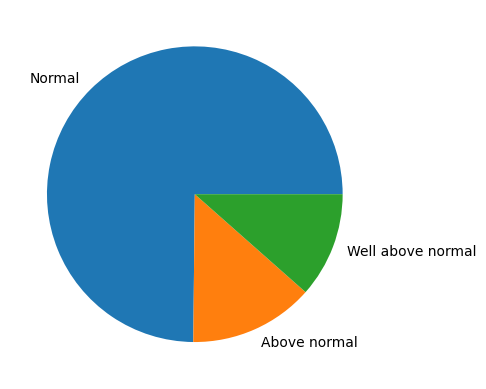

In [94]:
chol_count = df_disease.value_counts("cholesterol")    
chol_count
labels = ["Normal", "Above normal", "Well above normal"]
values = [chol_count[1], chol_count[2], chol_count[3]]
fig, ax = plt.subplots()
ax.pie(values, labels=labels)


#### C) Hur ser åldersfördelningen ut? Rita ett histogram.

In [96]:
# age in years instead of days
df_disease["age"] = df_disease["age"] / 365.25
df_disease["age"]

0        50.357290
1        55.381246
2        51.627652
3        48.249144
4        47.841205
           ...    
69995    52.676249
69996    61.878166
69997    52.199863
69998    61.412731
69999    56.235455
Name: age, Length: 70000, dtype: float64

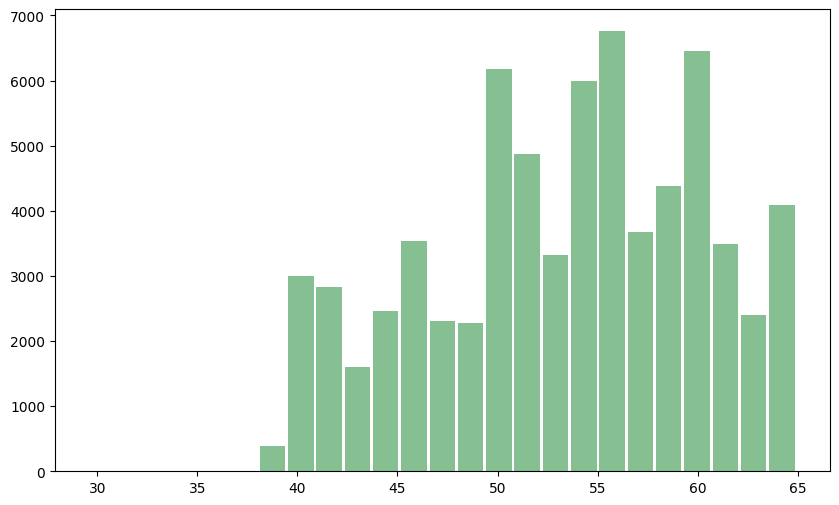

In [103]:
ax = df_disease["age"].hist(bins=25, grid=False, figsize=(10,6), color='#86bf91', zorder=2, rwidth=0.9)

#### D) Hur stor andel röker?


In [114]:
smokers = df_disease["smoke"].value_counts()
smoke_pos, smoke_neg= smokers[1], smokers[0] 

share_smokes = smoke_pos / df_disease["smoke"].count()

print(f"the share that smokes is = {share_smokes}") 

the share that smokes is = 0.08812857142857143


#### E) Hur ser viktfördelningen ut? Rita lämpligt diagram

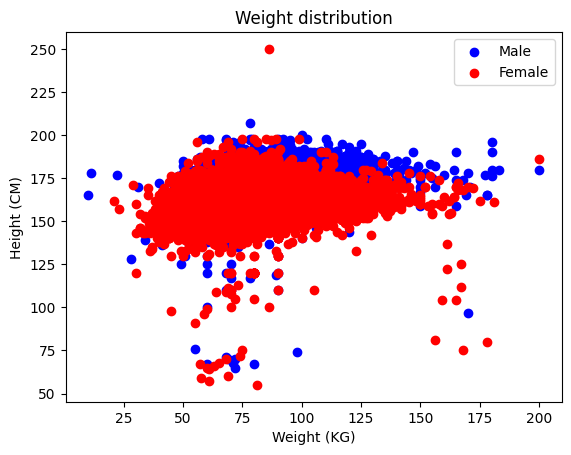

In [184]:
male_data = df_disease[df_disease["gender"] == 2]
female_data = df_disease[df_disease["gender"] == 1]

plt.scatter(male_data["weight"], male_data["height"], color='blue', label='Male')
plt.scatter(female_data["weight"], female_data["height"], color='red', label='Female')

plt.ylabel("Height (CM)")
plt.xlabel("Weight (KG)")
plt.title('Weight distribution')
plt.legend() 
plt.show()

#### F) Hur ser längdfördelningen ut? Rita lämpligt diagram.

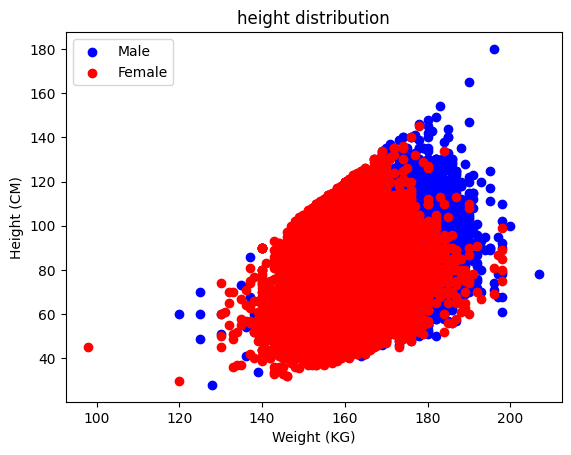

In [197]:
male_data = df_disease[df_disease["gender"] == 2]
female_data = df_disease[df_disease["gender"] == 1]

plt.scatter(male_data["height"], male_data["weight"],  color='blue', label='Male')
plt.scatter(female_data["height"] ,female_data["weight"] , color='red', label='Female')

plt.ylabel("Height (CM)")
plt.xlabel("Weight (KG)")
plt.title("height distribution")
plt.legend() 
plt.show()

#### G) Hur stor andel av kvinnor respektive män har hjärt-kärlsjukdom? Rita lämpligt diagram

In [162]:
male_count = df_disease["gender"] == 2
female_count = df_disease["gender"] == 1
female_count.sum()
male_count.sum()

24470

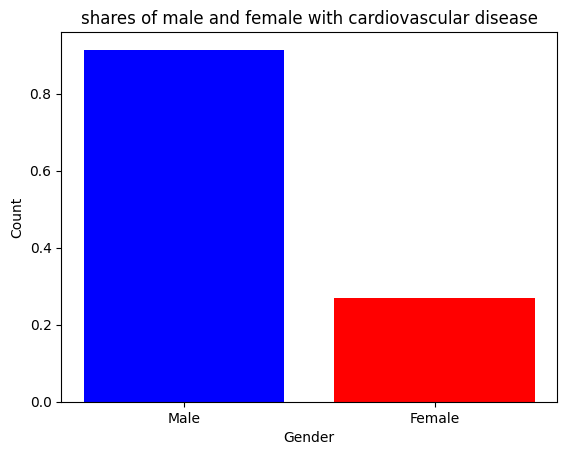

In [198]:
male_cardio_pos = (df_disease["cardio"] == 1) & (df_disease["gender"] == 1)
female_cardio_pos = (df_disease["cardio"] == 1) & (df_disease["gender"] == 2)

male_cardio_count = male_cardio_pos.sum()
female_cardio_count = female_cardio_pos.sum()

male_cardio_share = male_cardio_pos.sum() / male_count.sum()
female_cardio_share = female_cardio_pos.sum() / female_count.sum()

labels = ["Male", "Female"]
counts = [male_cardio_share, female_cardio_share]

plt.bar(labels, counts, color=["blue", "red"])
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("shares of male and female with cardiovascular disease")
plt.show()

### 2.1.0 - Feature engineering BMI

In [185]:
df_disease["height_m"] = df_disease["height"] / 100
df_disease["BMI"] = df_disease["weight"] / (df_disease["height_m"] ** 2 )
df_disease.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,height_m,BMI
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,1.68,21.967120
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1.56,34.927679
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,1.65,23.507805
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1.69,28.710479
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,1.56,23.011177


##### Important to note that BMI has limitations, especially for athletes, pregnant women, and individuals with a high muscle mass. However, below are the general BMI categories based on the World Health Organization (WHO) guidelines:
- Underweight: BMI less than 18.5
- Normal weight: BMI 18.5 to 24.9
- Overweight: BMI 25 to 29.9
- Obesity (Class 1): BMI 30 to 34.9
- Obesity (Class 2): BMI 35 to 39.9
- Obesity (Class 3): BMI 40 or greater


that is why we should sort away the outliers by removing any bmis under 15 and over 47 


In [199]:
condition = (df_disease["BMI"] < 47) & (df_disease["BMI"] > 15)
df_disease = df_disease[condition]

bmi_ranges = [0, 18.5, 25, 30, 35, 40, float("inf")]
bmi_labels = ["Underweight", "Normal weight", "Overweight", "Obesity (Class 1)", "Obesity (Class 2)", "Obesity (Class 3)"]

# Create a new categorical BMI feature based on the ranges and labels
df_disease["BMI_category"] = pd.cut(df_disease["BMI"], bins=bmi_ranges, labels=bmi_labels, right=False) #pd.cut takes bins and labels to sort the diffrent intervals between the bins to corresponding label 

df_disease 

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,height_m,BMI,BMI_category
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,1.68,21.967120,Normal weight
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1.56,34.927679,Obesity (Class 1)
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,1.65,23.507805,Normal weight
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1.69,28.710479,Overweight
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,1.56,23.011177,Normal weight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,99992,21074,1,165,80.0,150,80,1,1,0,0,1,1,1.65,29.384757,Overweight
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,1.68,26.927438,Overweight
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,1.83,31.353579,Obesity (Class 1)
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,1.63,27.099251,Overweight


### 2.1.1 - Feature engineering bloodpressure
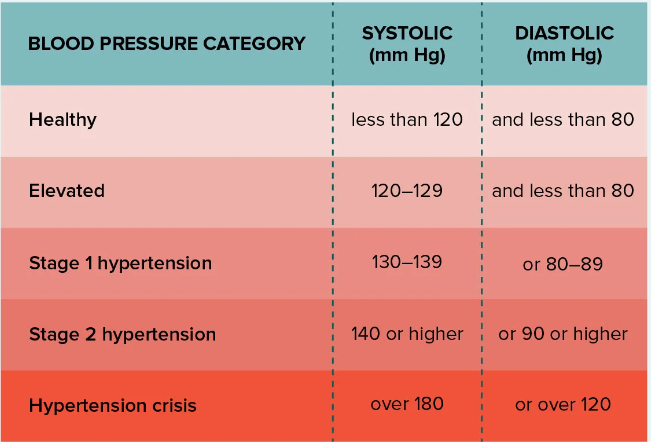

- we can create a categoriacal feature referring to this model, same as BMI